# 模型评估
此节内容只针对分类模型，使用sklearn库

## 1、准确率 

accuracy_score函数计算精度，在多标签分类中，该函数返回子集精度。如果样本的整个预测标签集与真实的标签集严格匹配，则子集精度为1.0; 否则它是0.0。如果$\hat{y}_i$是第$i$类样本预测值，$y_i$是相应的真值，那么正确预测的分数$n_\text{samples}$被定义为$$\texttt{accuracy}(y, \hat{y}) = \frac{1}{n_\text{samples}} \sum_{i=0}^{n_\text{samples}-1} 1(\hat{y}_i = y_i)$$

In [2]:
import numpy as np
from sklearn.metrics import accuracy_score
y_pred = [0, 2, 1, 3]
y_true = [0, 1, 2, 3]
accuracy_score(y_true, y_pred)

0.5

In [3]:
accuracy_score(y_true, y_pred, normalize=False) # 若normalize为False,则返回正确分类的样本数

2

## 2、混淆矩阵

该confusion_matrix函数通过计算混淆矩阵来评估分类准确性，行对应于真正的类，列表示预测值。

In [3]:
from sklearn.metrics import confusion_matrix
y_true = [2, 0, 2, 2, 0, 1]
y_pred = [0, 0, 2, 2, 0, 2]
confusion_matrix(y_true, y_pred)

array([[2, 0, 0],
       [0, 0, 1],
       [1, 0, 2]])

## 3、汉明损失

如果$\hat{y}_j$是预测为第$j$类的样本，$y_j$是真值，$n_\text{labels}$是类别的数目，则两个样本之间的汉明损失定义为：$$L_{Hamming}(y, \hat{y}) = \frac{1}{n_\text{labels}} \sum_{j=0}^{n_\text{labels} - 1} 1(\hat{y}_j \not= y_j)$$ $1(x)$是指标函数

In [4]:
from sklearn.metrics import hamming_loss
y_pred = [1, 2, 3, 4]
y_true = [2, 2, 3, 4]
hamming_loss(y_true, y_pred)

0.25

## 4、查准率、查全率和f1度量

在二元分类任务中，术语“正”和“负”指的是分类器的预测，术语“真”和“假”指的是该预测是否与外部判断相对应。

|。|实际类别|。|
|-|-|-|
|预测类别|tp(真 正)|fp(假 正)|
|-|fn(假 负)|tn(真 负)|  

在这种情况下，我们可以定义查准率，查全率和f1度量的概念：
$$\text{precision} = \frac{tp}{tp + fp},$$
$$\text{recall} = \frac{tp}{tp + fn},$$
$$F_\beta = (1 + \beta^2) \frac{\text{precision} \times \text{recall}}{\beta^2 \text{precision} + \text{recall}}.$$

查准率与查全率是一对矛盾的度量。一般来说，查准率高时，查全率往往偏低；而查全率高时，查准率往往偏低。例如：若希望将正样本尽可能多的选出来，则可通过增加选择样本的数量来实现，如果将所有的样本都选中，那么所有的正样本也必然都被选上了，但这样查准率就会较低；若希望选出的样本中正样本比例尽可能高，则可只挑选最有把握的样本，但这样难免就会漏掉不少正样本，使得查全率较低。通常只有在一些简单任务中，才可能使查全率和查准率都很高。f1度量的一般形式---$F_\beta$，能让我们表达出对查准率/查全率的不同偏好。  
> 详情可参考周志华《机器学习》P30-P32

In [5]:
from sklearn import metrics
y_pred = [0, 1, 0, 0]
y_true = [0, 1, 0, 1]
metrics.precision_score(y_true, y_pred)

1.0

---

In [6]:
metrics.recall_score(y_true, y_pred)

0.5

---

In [7]:
metrics.f1_score(y_true, y_pred)

0.6666666666666666

---

In [8]:
metrics.fbeta_score(y_true, y_pred, beta=0.5) 

0.8333333333333334

---

In [9]:
metrics.fbeta_score(y_true, y_pred, beta=1)  

0.6666666666666666

---

In [10]:
metrics.fbeta_score(y_true, y_pred, beta=2) 

0.5555555555555556

----

In [11]:
metrics.precision_recall_fscore_support(y_true, y_pred, beta=0.5)  

(array([0.66666667, 1.        ]),
 array([1. , 0.5]),
 array([0.71428571, 0.83333333]),
 array([2, 2]))

precision_recall_fscore_support计算每个类的查准率，查全率、f1度量和support，返回值：presion, recall, fbeta_score, support(每个标签出现的次数)

---

## 5、分类报告 

该classification_report函数构建一个显示主要分类指标的文本报告

In [12]:
from sklearn.metrics import classification_report
y_true = [0, 1, 2, 2, 0]
y_pred = [0, 0, 2, 1, 0]
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.67      1.00      0.80         2
     class 1       0.00      0.00      0.00         1
     class 2       1.00      0.50      0.67         2

   micro avg       0.60      0.60      0.60         5
   macro avg       0.56      0.50      0.49         5
weighted avg       0.67      0.60      0.59         5



## 6、 ROC曲线

ROC全称是“受试者工作特征”，根据学习器的预测结果对样例进行排序，按此顺序把样本作为正例进行预测，每次计算出两个重要的值，分别以它们为横纵坐标作图，就得到了ROC曲线。ROC曲线的纵轴是“真正例率（TPR）”，横轴是“假正例率（FPR）”，二者定义为：$$\text{TPR} = \frac{tp}{tp + fn}$$, $$\text{FPR} = \frac{fp}{tn + fp}$$   
ROC曲线通常在Y轴上具有真正例率，在X轴上具有假正例率，这意味着图的左上角是“理想”点-假阳性率为零，真阳性率为1。因此，曲线下面积越大越好，The “steepness” of ROC curves is also important, since it is ideal to maximize the true positive rate while minimizing the false positive rate.

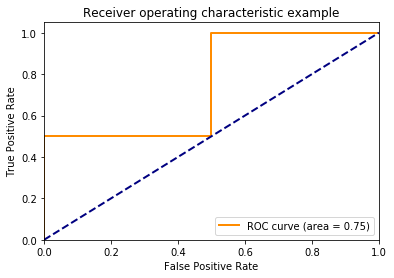

In [19]:
import numpy as np
# from pylab import *
from sklearn.metrics import roc_curve, roc_auc_score
y = np.array([1, 1, 2, 2])
scores = np.array([0.1, 0.4, 0.35, 0.8])
fpr, tpr, thresholds = roc_curve(y, scores, pos_label=2)
roc_auc = roc_auc_score(y, scores)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

> 由于数据过于简单，因此画出的图形也比较简单：(

# 作业

1. 在上节课实验的基础上，计算出朴素贝叶斯针对所给数据集的准确率，汉明损失，混淆矩阵，查准率、查全率，f1度量和ROC，并画出ROC曲线
2. 给定完整数据集，分别计算在使用完整数据集的10%,30%,50%,80%,100%数据时的查准率、查全率，f1度量和ROC，使用折线图表现出这些指标的变化情况，并画出在不同数据量下的ROC曲线